## 자전거 대여 수요 예측
#### 2011년 1월부터 2012년 12월까지 날짜/시간, 기온, 습도, 풍속 등의 정보를 기반으로 1시간 간격 동안의 자전거 대여 횟수가 기재되어 있다.

- datetime: hourly date + timestamp
- season : 1=봄, 2=여름, 3=가을, 4=겨울
- holiday : 1=토,일요일의 주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날
- workingday : 1=토,일요일의 주말 및 휴일이 아닌 주중, 0=주말 및 휴일
- weather:
 - 1=맑음, 약간 구름 낀 흐림
 - 2=안개, 안개+흐림
 - 3=가벼운 눈, 가벼운 비+천둥
 - 4=심한 눈/비, 천둥/번개
- temp : 온도 (섭씨)
- atemp : 체감온도 (섭씨)
- humidity : 상대습도
- windspeed : 풍속
- casual : 사전에 등록되지 않은 사용자가 대여한 횟수
- registered : 사전에 등록된 사용자가 대여한 횟수
- count : 대여 횟수

## 다음 코드는 복습과제를 하는데 있어 필요한 모듈입니다. 한 번 꼭 돌려주고 실습해 주세요.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

## 1. 데이터 불러오기 및 전처리
### (1) bikeshare.csv를 pandas를 이용해 bike_df의 이름으로 저장하고 행렬 개수와 5개의 자료를 뽑아보시오.

In [3]:
bike_df=pd.read_csv('bikeshare.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### (2) bike_df에서 항목별 데이터 타입을 확인하는 코드를 작성하시오.

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### (3) pandas를 이용해 datetime의 칼럼을 년, 월, 일, 시간과 같은 4개의 속성으로 분리하시오.
- 판다스에서 문자열을 datatime 타입으로 변환하는 apply(pd.to_datetime) 메서드를 이용해 datetime이라는 이름의 새로운 칼럼을 만드시오.

In [5]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


- apply() 함수와 lambda를 이용해 새로운 datetime 칼럼에서 년, 월, 일, 시간 칼럼을 새로 만드시오.

In [6]:
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)


- 3개의 bike_df를 뽑아 제대로 칼럼들이 생성되었는지 확인하시오.

In [7]:
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


* datatime, causal, registered 칼럼을 삭제 하시오.(casual + registered = count이므로 따로 필요하지 않습니다.) 

In [8]:
bike_df.drop(['datetime', 'casual', 'registered' ],axis=1,inplace=True)

## 2. 선형 회귀 실습하기

### (1) X_fearues와 y_target이라는 이름으로 독립변수와 종속변수를 분리하시오. (종속변수 = count)

In [9]:
X_features = bike_df.drop(['count'],axis=1,inplace=False)
y_target = bike_df['count']

### (2) 숫자형 카테고리 값을 pandas의 get_dummies를 이용해 원-핫 인코딩하시오.
- 현재 데이터타입이 숫자형 카테고리인 칼럼은 year,month,day,hour,holiday,workingday,season,weather 입니다.
- X_features_ohe란 이름에 저장하세요.

In [10]:
#숫자형 카테고리값을 선형 회귀에 사용할 경우 숫자 자체의 값에 영향을 많이 받기 때문
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','hour', 'holiday','workingday','season','weather'])

### (3) 사이킷런에서 train_test_split을 이용해 훈련세트와 테스트 세트를 분리하시오.
- 이때 종속변수는 count 칼럼이고 독립변수는 종속변수 이외의 모든 칼럼입니다.
- X_train,X_test,y_train,y_test 이란 이름으로 세트를 만들고 test_size=0.3,random_state=0 이라는 옵션 추가하세요.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target,
                                                    test_size=0.3, random_state=0)

### (4) 회귀 종류별로 실습

#### i. 선형 회귀
- 사이킷런에서 LinearRegression 을 불러와 fit한 후 X_test를 예측하여 pred란 이름에 저장하시오.
- 사이킷런에서의 mean_square_error과 np.sqrt()를 이용해 y_test와 pred의 RMSE를 출력하시오.
- 이 모델의 intercept와 coefficient를 출력하시오.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))

RMSE: 101.5450895352674


In [20]:
print(lr_reg.coef_, lr_reg.intercept_)


[ 3.18944002e+00  1.47361303e+00 -8.11870791e-01 -7.34809893e-01
  4.62954930e-01  2.42953869e+13  2.42953869e+13  6.64535297e+12
  6.64535297e+12  6.64535297e+12  4.25375292e+12  4.25375292e+12
  4.25375292e+12 -4.87000169e+12 -4.87000169e+12 -4.87000169e+12
  5.31394361e+12  5.31394361e+12  5.31394361e+12 -6.79229530e+09
 -6.79229532e+09 -6.79229533e+09 -6.79229534e+09 -6.79229534e+09
 -6.79229532e+09 -6.79229527e+09 -6.79229513e+09 -6.79229498e+09
 -6.79229513e+09 -6.79229519e+09 -6.79229517e+09 -6.79229512e+09
 -6.79229513e+09 -6.79229514e+09 -6.79229514e+09 -6.79229507e+09
 -6.79229491e+09 -6.79229495e+09 -6.79229506e+09 -6.79229514e+09
 -6.79229519e+09 -6.79229523e+09 -6.79229527e+09 -7.56153045e+11
 -7.56153045e+11 -5.15227223e+12 -5.15227223e+12  2.22940361e+12
  4.62100366e+12  1.37447583e+13  3.56081297e+12  2.11885920e+12
  2.11885920e+12  2.11885920e+12  2.11885920e+12] -29373785108544.285


#### ii. 확률적 경사 하강법을 이용한 선형 회귀
- 사이킷런에서 제공하는 SGDRegressor을 이용해 위와 같은 과정을 반복하시오.
- 이때 max_iter=1000,tol=1e-3,penalty=None,eta0=0.1 인 옵션을 추가하시오.

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X_train, y_train)
pred = sgd_reg.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))

RMSE: 11176017666451.895


<AxesSubplot:>

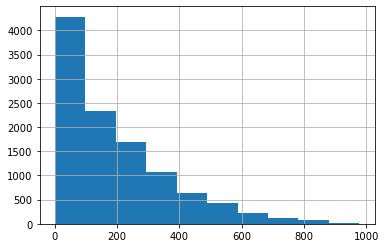

In [17]:
y_target.hist()

※ 회귀에서 큰 예측 오류가 발생할 경우
target 값의 분포가 왜곡된 형태를 이루고 있는지 확인해야한다
로그 취해서 정규분포에 가깝게 바꾸는 과정 필요

y_target_log = np.log1p(y_target)
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)
sgd = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd.fit(X_train, y_train)
pred = sgd.predict(X_test)

y_test_exp = np.expm1(y_test)

pred_exp = np.expm1(pred)
print('RMSE:',np.sqrt(mean_squared_error(y_test_exp ,pred_exp)))

result/ RMSE: 265.8344463148444

In [15]:
print(sgd_reg.coef_, sgd_reg.intercept_)

[-2.72940247e+09  2.76882470e+10  1.51569180e+11 -1.56742566e+10
  1.03582299e+11  4.66694467e+10 -5.79633218e+10  1.66304873e+10
 -1.18757091e+11  1.62069491e+11  3.70711054e+10 -1.68912889e+11
 -5.16699648e+10  5.91723526e+10  7.68144882e+10 -6.60247566e+09
 -7.36529717e+10  7.59338309e+09  4.89502102e+10  8.00243013e+10
 -4.80970926e+10 -2.86461045e+10 -1.44423943e+11  4.95694068e+10
  6.00371155e+10 -3.82929940e+10  1.58345993e+11 -4.05695440e+10
  1.17317153e+11 -1.10626671e+11  9.93629295e+10  9.57642813e+09
 -2.51221497e+11  5.78472211e+10 -8.07415347e+10 -1.43265708e+11
  4.64767592e+10 -3.39087073e+10 -7.31475349e+10  1.23328236e+11
  8.26478531e+10  1.79568599e+11 -8.24545395e+10 -2.62998773e+10
  1.50060022e+10  9.72825223e+09 -2.10221273e+10  5.99428866e+10
 -1.83511749e+11  1.29384365e+11 -1.71093784e+10  3.60332980e+09
  5.11159376e+10 -7.64451918e+06 -6.60054980e+10] [-1.12938751e+10]


#### iv. 라쏘와 릿지
- 위와 같은 방식대로 사이킷런에서 Ridge와 Lasso를 불러와 RMSE를 출력하시오.
- 각각의 intercept, coefficient를 출력하시오.
- Ridge와 Lasso에서 alpha=0.1 이라는 옵션을 추가하시오.

In [21]:
from sklearn.linear_model import Ridge, Lasso
ridge_reg = Ridge(alpha=0.1)

In [22]:
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
print(ridge_reg.coef_, ridge_reg.intercept_)

RMSE: 101.54348879450757
[ 3.19309859e+00  1.47395310e+00 -8.12948020e-01 -7.33754190e-01
  4.63281535e-01 -4.30521244e+01  4.30521244e+01 -2.79681791e+01
 -1.11097314e+01  6.21606222e+00 -1.00056633e+01  1.51424903e+01
  2.99162714e+00 -1.08132782e+01 -1.02511126e+01  2.45584932e+01
  2.23152984e+01  1.49247772e-02 -1.09093157e+00 -1.24557513e+02
 -1.45016957e+02 -1.59112768e+02 -1.66328457e+02 -1.67904639e+02
 -1.49896573e+02 -9.41935186e+01  4.05865061e+01  1.93034608e+02
  4.10135478e+01 -1.64712711e+01  5.62882290e+00  5.19838274e+01
  4.69929414e+01  3.29634764e+01  3.70161031e+01  1.00305535e+02
  2.62422320e+02  2.28747155e+02  1.14331475e+02  3.34585737e+01
 -1.93607817e+01 -5.26733707e+01 -9.29690438e+01  1.37596812e+00
 -1.37596812e+00 -2.04110508e+00  2.04110508e+00 -3.28618482e+01
  8.12845419e+00  3.49410242e+00  2.12392916e+01  6.11696687e+01
  5.03520881e+01 -7.84277952e+00 -1.03678977e+02] 90.87453329770462


In [23]:
lasso_reg = Lasso(alpha=0.1)

In [24]:
lasso_reg.fit(X_train, y_train)
pred = lasso_reg.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
print(lasso_reg.coef_, lasso_reg.intercept_)

RMSE: 101.54034666529932
[ 3.64416563e+00  1.42510446e+00 -8.76767794e-01 -7.15203427e-01
  4.49073897e-01 -8.50609514e+01  0.00000000e+00 -2.99206749e+01
 -1.36000049e+01  0.00000000e+00 -4.97546652e+00  1.69864624e+01
  2.83417304e+00 -5.41987638e+00 -4.12640985e+00  3.00807993e+01
  1.91905912e+01  0.00000000e+00 -0.00000000e+00 -1.49691880e+02
 -1.70066347e+02 -1.83700906e+02 -1.90672000e+02 -1.92137192e+02
 -1.74074378e+02 -1.18440833e+02  1.14206316e+01  1.63371241e+02
  1.06758427e+01 -4.26935320e+01 -2.10413750e+01  1.98681525e+01
  1.45025279e+01  9.08619274e-02  3.93920736e+00  6.74783138e+01
  2.29996848e+02  1.96077152e+02  8.27812484e+01  2.27795447e+00
 -4.52467376e+01 -7.83252945e+01 -1.18340143e+02  1.26387280e-02
 -8.43952179e-15 -3.68713759e+00  0.00000000e+00 -3.02368583e+01
  4.03939722e-01 -9.03755970e+00  1.92254847e+01  1.00520057e+01
  0.00000000e+00 -5.55526839e+01 -0.00000000e+00] 215.5666740960637


## 3. 로지스틱 회귀 분석 실습 _ 와인 종류 분류하기 : 와인의 화학 조성을 사용하여 와인의 종류를 예측하기 위한 데이터이다. 

In [25]:
# 와인 데이터를 불러오기 위한 코드입니다. 꼭 실행해주세요.
from sklearn import datasets

ㅇ 타겟 데이터 : 와인의 종류 0, 1, 2의 세가지 값

ㅇ 특징 데이터

* 알콜(Alcohol)

* 말산(Malic acid)

* 회분(Ash)

* 회분의 알칼리도(Alcalinity of ash)

* 마그네슘(Magnesium)

* 총 폴리페놀(Total phenols)

* 플라보노이드 폴리페놀(Flavanoids)

* 비 플라보노이드 폴리페놀(Nonflavanoid phenols)

* 프로안토시아닌(Proanthocyanins)

* 색상의 강도(Color intensity)

* 색상(Hue)

* 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)

* 프롤린(Proline)

####3-1. 와인 데이터 가져오기 

In [26]:
wine_data = datasets.load_wine()

더 자세한 데이터에 대한 설명을 보고싶으시다면 아래의 코드를 실행해주시면 됩니다. 

In [27]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### 3-2. 입력변수와 목표변수 설정하기
* 입력변수를 사용하기 편하게 pandas dataframe으로 변환해주세요.
  - 입력변수는 data (.data) 함수를 써서 가져오시면 됩니다.
  - 칼럼명 가져오기 : .feature_names 
* 목표변수를 사용하기 편하게 pandas dataframe으로 변환해주세요
  - 목표변수는 target (.target) 함수를 써서 가져요오시면 됩니다. 
  - 칼럼명은 'target'으로 지정해주세요

In [31]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [32]:
# 입력 변수를 사용하기 편하게 pandas dataframe으로 변환
X = pd.DataFrame(data = wine_data.data, columns=wine_data.feature_names)
# 목표 변수를 사용하기 편하게 pandas dataframe으로 변환
y = pd.DataFrame(data= wine_data.target)

#### 3-3. 훈련 데이터, 테스트 데이터 만들기
* train_test_split 함수를 사용해 테스트 셋의 비율이 0.2가 되도록 X_train, X_test, y_train, y_test 을 만들어주세요. random_state=5로 설정해주세요.
* 경고메세지를 없애도록 y_train = y_train.values.ravel() 를 실행해주세요

In [33]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [34]:
y_train = y_train.values.ravel() 

#### 3-4. 모델훈련
* 로지스틱회귀 함수에서 옵션을 solver='saga', max_iter=7500으로 설정해주세요.
* 학습데이터로 모델을 학습시켜주세요

In [35]:
# 필요한 라이브러리 import
from sklearn.linear_model import LogisticRegression
lg_reg= LogisticRegression(solver='saga', max_iter=7500)
lg_reg.fit(X_train, y_train)

LogisticRegression(max_iter=7500, solver='saga')

#### 3-5. 예측
* 테스트 데이터 셋으로 로지스틱 회귀 모델을 이용해 와인 데이터 분류를 예측해 결과를 y_test_predict 변수에 담아주세요
* score함수를 사용해 로지스틱 회귀 모델의 성능을 score 변수에 담아주세요
* y_test_predict와 score 결과를 확인해주세요.

In [36]:
# 로지스틱 회귀 모델를 이용해서 각 와인 데이터 분류를 예측함
y_test_predict = lg_reg.predict(X_test)

# 로지스틱 회귀 모델의 성능 확인 (정확성 %를 리턴함)
score=lg_reg.score(X_test, y_test)

# 결과확인 
y_test_predict, score

(array([0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2]),
 0.75)

#### (선택) 3-6. GridSearchCV 복습

`LogisticRegression` 모델에 `param_grid`를 사용하여 GridSearchCV를 진행해주세요.
- cv = 5
- 추가적으로 코드를 작성하실 필요 없이, 골뱅이@@@ 부분의 코드를 완성해서 출력해주시면 됩니다. 

In [37]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

# param_grid (수정하셔도 됩니다)
params = {
    'penalty':['l1', 'l2', 'elasticnet'],        # l1 is Lasso, l2 is Ridge
    'C': np.linspace(0.00002,1,100)
}

# GridSearch
grid_search = GridSearchCV(lg_reg, param_grid=params , cv = 5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=7500, solver='saga'),
             param_grid={'C': array([2.00000000e-05, 1.01208081e-02, 2.02216162e-02, 3.03224242e-02,
       4.04232323e-02, 5.05240404e-02, 6.06248485e-02, 7.07256566e-02,
       8.08264646e-02, 9.09272727e-02, 1.01028081e-01, 1.11128889e-01,
       1.21229697e-01, 1.31330505e-01, 1.41431313e-01, 1.51532121e-01,
       1.61632929e...
       7.67681414e-01, 7.77782222e-01, 7.87883030e-01, 7.97983838e-01,
       8.08084646e-01, 8.18185455e-01, 8.28286263e-01, 8.38387071e-01,
       8.48487879e-01, 8.58588687e-01, 8.68689495e-01, 8.78790303e-01,
       8.88891111e-01, 8.98991919e-01, 9.09092727e-01, 9.19193535e-01,
       9.29294343e-01, 9.39395152e-01, 9.49495960e-01, 9.59596768e-01,
       9.69697576e-01, 9.79798384e-01, 9.89899192e-01, 1.00000000e+00]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

학습된 gridsearch 모델에 저장되어 있는 best parameter, best score 를 출력해주세요.

In [38]:
grid_search.best_params_, grid_search.best_score_

({'C': 0.11112888888888889, 'penalty': 'l2'}, 0.8884126984126983)